In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


타이타닉 훈련셋과 테스트셋 불러오기

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

훈련셋 정보 확인

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

Age, Cabin 에서 몇개의 데이터가 빠져있는걸 확인 가능

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


훈련셋에는 Age : 177개 Canin : 687개 값들이 빠져있다.

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

테스트셋에서도 마찬가지로 Age와 Cabin에 값들이 빠져있다.

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Survivied는 생존 여부(0은 사망, 1은 생존; train 데이터에서만 제공),

Pclass는 사회경제적 지위(1에 가까울 수록 높음),

SipSp는 배우자나 형제 자매 명 수의 총 합,

Parch는 부모 자식 명 수의 총 합을 나타낸다.


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

성별, 나이, 자리 등급 등 특성에 따라 죽었는지 살았는지 그림으로 나타내기

In [12]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()  
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')
        
    plt.show()

In [13]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

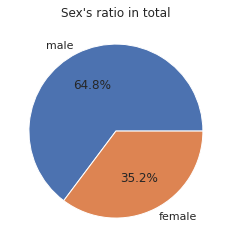

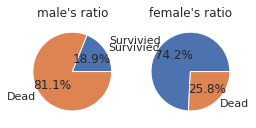

In [14]:
pie_chart('Sex')

남자 : 0 여자 : 1

남성이 여성보다 많이 탔으며 남성보다 여성의 생존비율이 높다는것을 볼 수 있다.

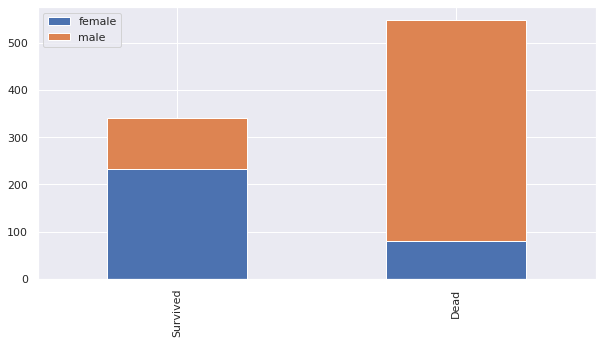

In [15]:
bar_chart('Sex')

여자들이 남자들보다 살아날 확률이 높았다는걸 알 수 있다.

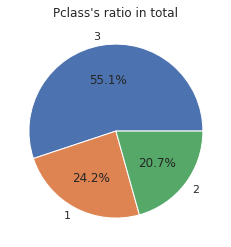

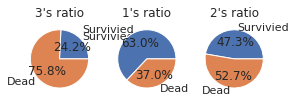

In [16]:
pie_chart('Pclass')

위와 같이 Pclass가 3인 사람들의 수가 가장 많았으며, Pclass가 높을수록 생존 비율이 높다는 것을 알 수 있다.

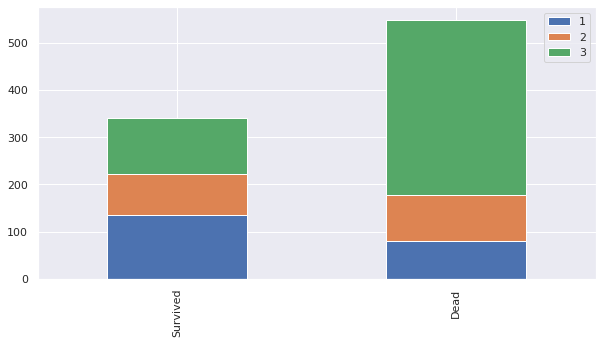

In [17]:
bar_chart('Pclass')

1등급 클래스가 생존확률에 큰 역할을 했다는 것을 알 수 있다.

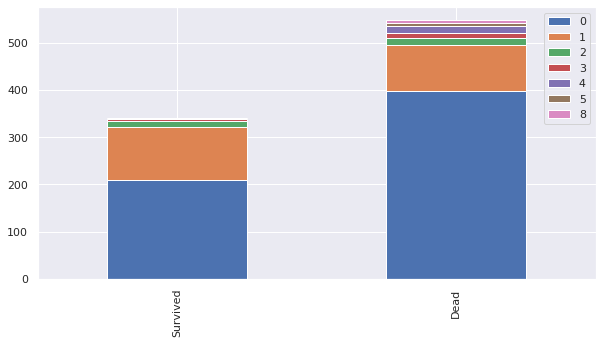

In [18]:
bar_chart('SibSp')

타이타닉에 동승자에 따른 생존율과 사망율을 보여준다.

동승자가 있을경우 생존율이 좀 더 있다는 것을 보여준다.

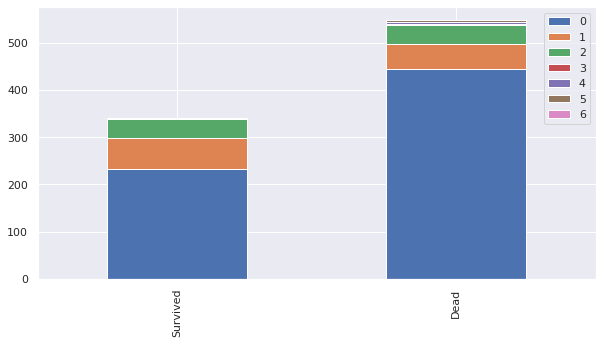

In [19]:
bar_chart('Parch')

혼자 탑승했을 때 보다 부모님이나 아이들과 탑승했을때 더 많이 산 것을 볼 수 있다.

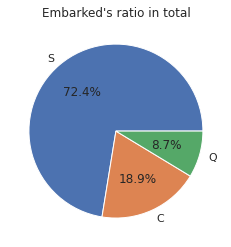

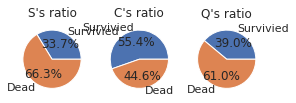

In [20]:
pie_chart('Embarked')

위와 같이 S에서 선착한 사람이 가장 많았으며, C에서 탄 사람 중에서는 생존한 사람의 비율이 높았고, 나머지 두 선착장에서 탄 사람들은 생존한 사람보다 그렇지 못한 사람이 조금 더 많았다.

지금까지 살펴본 데이터 특성들을 간략하게 종합해보면,

성별이 여성일 수록, 

Pclass가 높을 수록, 

C선착장에서 배를 탔다면,

형제, 자매, 배우자, 부모, 자녀와 함께 배에 탔다면,

생존 확률이 더 높았다는 것을 볼 수 있다.

우리가 조사할 특성은 Name, Sex, Embarked, Age, SibSp, Parch, Fare, Pclass이며, Ticket과 Cabin에 대한 의미는 아직 찾지 못했으므로 데이터 세트에서 제외하도록 하겠다.

# **Name**

이름의 정보에는 Mr, Miss, Mrs 등이 담겨있는데 이것으로 성별, 결혼유무를 예측할 수 있다.

데이터에 Title이라는 새로운 열을 만들어 Title에서 추출한 Title을 넣어주자.

In [21]:
train_test_data = [train, test] # 훈련셋과 테스트셋 합치기
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) #' ([A-Za-z]+)\.'는 정규표현식인데 공백으로 시작하고 '.'으로 끝나는 문자열울 추출할때 쓰인다

In [22]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [23]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

 추출한 Title을 가진 사람이 몇 명이 존재하는지 성별과 함께 표현을 해보자.

In [24]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                                 'Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


그리고 추출한 Title 데이터를 학습하기 알맞게 String Data로 변형

In [26]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].astype(str)

# **Sex**

승객의 성별을 나타내는 Sex Feature를 처리할 것인데 이미 male과 female로 나뉘어져 있으므로 String Data로만 변형해주면 된다.

In [27]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].astype(str)

# **Age**

Age에는 빠진 정보가 들어있다.

In [28]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S,Mr
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,Mr
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Mrs


Age의 결측값에는 전체 사람들 나이의 평균을 넣을 수도 있지만 

아까 위에서 Title열로 이름에 따라 나눴기 때문에 이걸 활용하여 

각 이름에 따른 중간값을 넣었다.

Age값이 Null일 경우에는 각 Title 별로 Age의 median값을 넣는다.

In [29]:
for dataset in train_test_data:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['AgeBand'] = pd.cut(train['Age'], 5)
print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


그래프로 표현하면 16~36 사이의 나이가 사망을 많이 했다는것을 볼 수 있다.

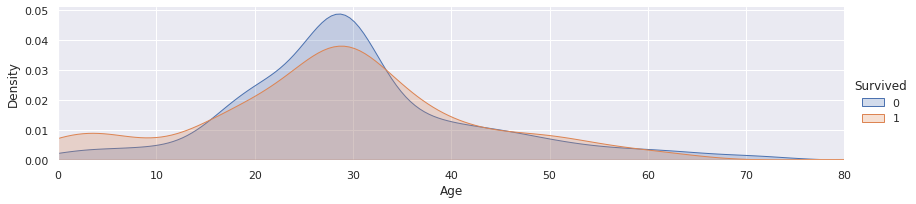

In [30]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

나이 구간에 따라 그래프 확인

(0.0, 20.0)

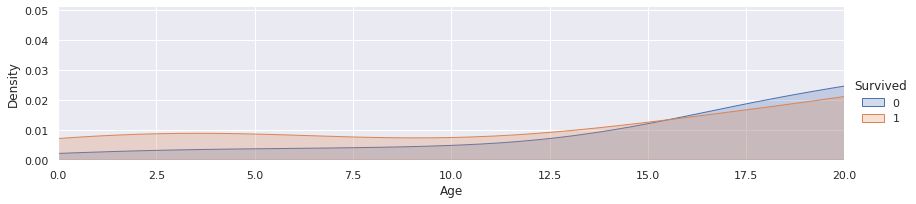

In [31]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

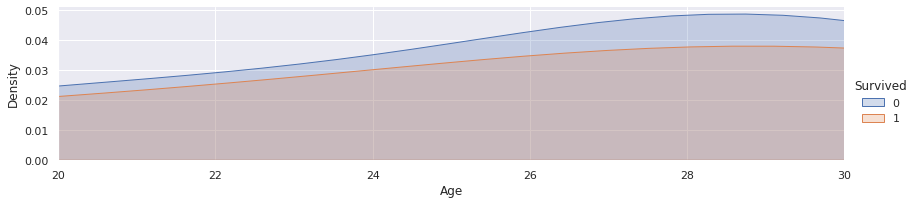

In [32]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

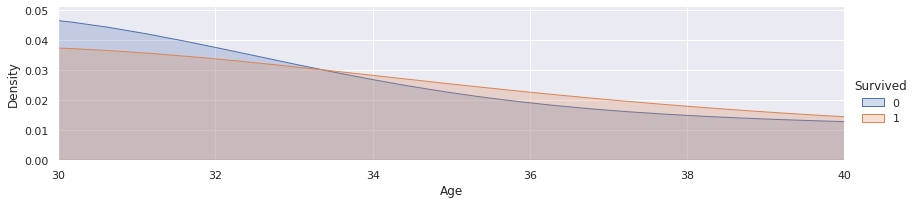

In [33]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

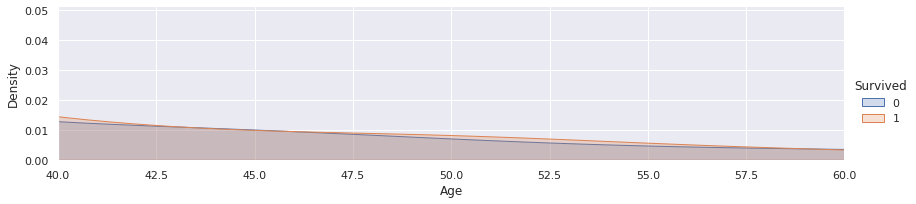

In [34]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(40.0, 60.0)

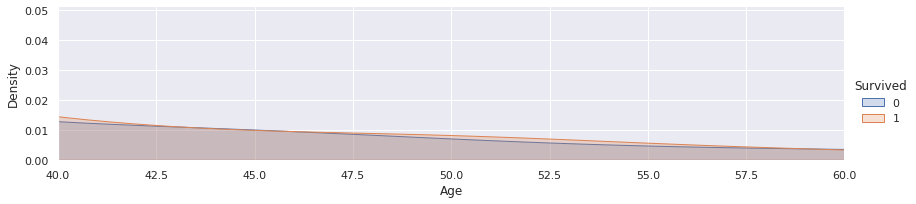

In [35]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

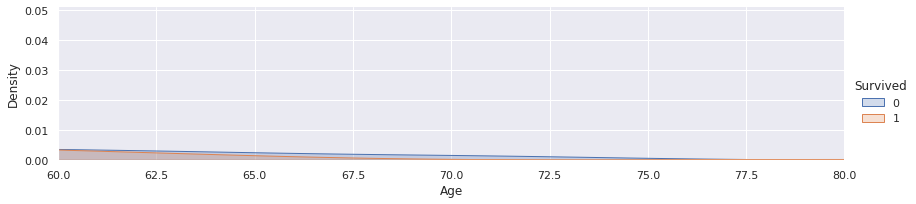

In [36]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Title        891 non-null    object  
 13  AgeBand      891 non-null    category
dtypes: category(1), float64(1), int64(6), object(6)
memory usage: 91.7+ KB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 39.3+ KB


**Binning**

Binning이란 연속형 변수를 특정 구간으로 나누어 범주형 또는 순위형 변수로 변환하는 방법이다.

나이를 한번에 데이터에 넣으면 0~80까지 너무 많은 정보가 있다

그렇기 때문에 5구간으로 쪼개서 값을 넣어준다.

child: 0

Young: 1

Middle: 2

Prime: 3

Old: 4

In [39]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,Young,1,0,A/5 21171,7.2500,NaN,S,Mr,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Prime,1,0,PC 17599,71.2833,C85,C,Mrs,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,Young,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Middle,1,0,113803,53.1000,C123,S,Mrs,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,Middle,0,0,373450,8.0500,NaN,S,Mr,"(32.0, 48.0]"


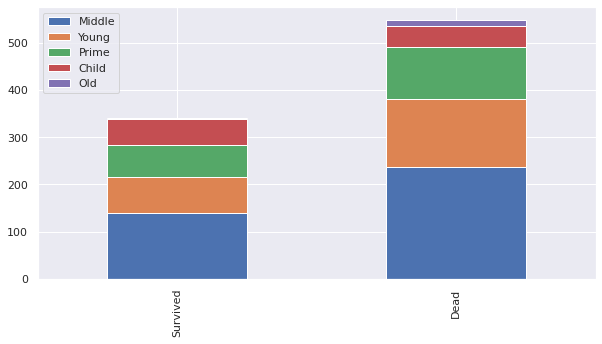

In [41]:
bar_chart('Age')

각 나이대별로 생존율과 사망율의 차이가 눈에 보인다.

즉 Age에 Binning(각 카테고리에 정보(Age)를 담아 명확하게 하는 방법)을 이용하여 더 효율적인 데이터로 만들었다.

# **Embarked**

살펴본 데이터 정보에 따르면 train 데이터에서 Embarked feature에는 NaN 값이 존재하며, 다음코드로 알아보자.

In [42]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

value_count()에서 dropna를 False로 해주면 NaN 값을 포함한 갯수의 총합을 세준다.

In [43]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

S의 데이터수가 압도적으로 많으므로 NaN값에 S를 써줘도 무방할 것이다.

# **Fare(티켓 가격)**

만약 티켓 가격이 안 적혀 있을 경우에는 가장 티켓 가격과 밀접한 관계가 있는 Pclass를 활용한다.

Fare 데이터가 빠진 값의 Pclass를 가진 사람들의 평균 Fare를 넣어주는 식으로 처리를 해보자.

In [44]:
print (train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


위에서 볼 수 있듯이 누락된 데이터의 Pclass는 3이고, train 데이터에서 Pclass가 3인 사람들의 평균 Fare가 13.675550이므로 이 값을 넣어주자.

In [45]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(13.675)

Age에서 했던 것처럼 Fare에서도 Binning을 해보자. 

In [46]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

# **FamilySize(가족의 크기)**

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,Young,1,0,A/5 21171,0,NaN,S,Mr,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Prime,1,0,PC 17599,4,C85,C,Mrs,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,Young,0,0,STON/O2. 3101282,1,NaN,S,Miss,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Middle,1,0,113803,4,C123,S,Mrs,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,Middle,0,0,373450,1,NaN,S,Mr,"(32.0, 48.0]"


함께 동승한 부모님과 아이들의 수와 형제와 배우자의 수의 사망률에 대해 관계가 유사하였고, 궁금한 점은 혼자 탔는지 아니면 함께 탔는지가 궁금하기때문에 SibSb 데이터와 Parch 데이터를 합쳐 하나의 값을 만들었다.

In [48]:
for dataset in train_test_data:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
    dataset['Family'] = dataset['Family'].astype(int)

# **Modeling**

이제 사용할 Feature에 대해서는 전처리가 되었으니, 학습시킬때 제외시킬 Feature들을 Drop 시키자.

결과값으로 가공처리된 데이터들을 확인할 수 있다.

In [49]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand'], axis=1)

print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age  Fare Embarked Title  Family
0         0       3    male   Young     0        S    Mr       1
1         1       1  female   Prime     4        C   Mrs       1
2         1       3  female   Young     1        S  Miss       0
3         1       1  female  Middle     4        S   Mrs       1
4         0       3    male  Middle     1        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female   Prime     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male  Middle     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


마지막으로 Categorical Feature에 대해 one-hot encoding과 train data와 label을 분리시키는 작업을 하면 예측 모델에 학습시킬 준비가 끝났다.

In [50]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

# ***설계 및 학습***

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

import numpy as np

데이터가 정렬되어있어 학습에 방해가 될 수도 있으므로 섞어주기

In [52]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

모델 학습과 평가에 대한 pipeline을 만들자.

 fit()과 predict()를 사용하면 매우 간단하게 학습과 예측을 할 수 있어서 그냥 하나의 함수만 만들면 편하게 사용가능하다.

In [53]:
def train_test_data(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [54]:
# Logistic Regression
log_pred = train_test_data(LogisticRegression())
# SVM
svm_pred = train_test_data(SVC())
#kNN
knn_pred_4 = train_test_data(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_test_data(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_test_data(GaussianNB())

Accuracy :  82.94 %
Accuracy :  83.61 %
Accuracy :  84.62 %
Accuracy :  89.23 %
Accuracy :  79.57 %


나이브 베이즈라고 불리는 분류기로 베이즈 정리에 기반한 통계적 분류 기법으로 가장 단순한 지도 학습이다.

randomforest가 가장 높은 점수를 냈으니 캐글에 randomforest로 테스트를 진행한다.

# **Testing**

In [55]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": rf_pred
})

submission.to_csv('submission_rf.csv', index=False) #csv로 바꿔야 캐글에 제출가능